In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

path = 'developer_survey_2019/survey_results_public.csv'

In [2]:
df = pd.read_csv(path)
schema = pd.read_csv(path_schema)
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [3]:
def get_salarys(cond):
    salarys = df[cond & (df['Employment'] == 'Employed full-time') & (df['Country']=='United States')]['CompTotal'].dropna()
    return salarys[(salarys != 0)]

def get_hours(cond):
    return df[ cond & (df['Employment'] == 'Employed full-time')& (df['Country']=='United States')]['WorkWeekHrs'].dropna()

def get_sat(cond):
    ordered_sat = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied',  'Very satisfied' ]
    sat = df[cond & (df['Employment'] == 'Employed full-time')& (df['Country']=='United States')]['JobSat'].dropna()
    return sat.astype("category", ordered=True, categories=ordered_sat).cat.codes
    # return sat

def trim_mean(s0, s1, alpha=0.05):
    return stats.trim_mean(s0, alpha), stats.trim_mean(s1, alpha), (stats.trim_mean(s0, alpha)- stats.trim_mean(s1, alpha))/stats.trim_mean(s0, alpha)

In [4]:
man_salarys = get_salarys(df['Gender'] == 'Man')

In [5]:
woman_salarys = get_salarys(df['Gender'] == 'Woman')

In [6]:
man_hours = get_hours(df['Gender'] == 'Man')

In [7]:
woman_hours = get_hours(df['Gender'] == 'Woman')

In [8]:
df['Sexuality'].unique()

array(['Straight / Heterosexual', 'Bisexual', nan,
       'Bisexual;Gay or Lesbian;Straight / Heterosexual',
       'Gay or Lesbian', 'Bisexual;Gay or Lesbian',
       'Bisexual;Straight / Heterosexual',
       'Gay or Lesbian;Straight / Heterosexual'], dtype=object)

In [9]:
straight_sat = get_sat(df['Sexuality']=='Straight / Heterosexual')

In [10]:
minor_sat = get_sat(df['Sexuality']!='Straight / Heterosexual')

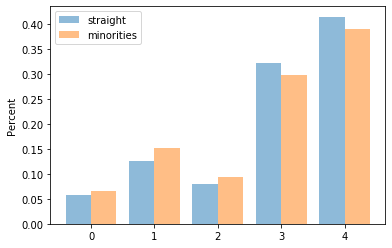

In [58]:
ind = straight_sat.value_counts().index
width=.2
plt.bar(ind-width,(straight_sat.value_counts()/straight_sat.shape[0]), alpha=0.5, width=width*2,label='straight')
ind = minor_sat.value_counts().index
plt.bar(ind+width,(minor_sat.value_counts()/minor_sat.shape[0]),alpha=0.5, width=width*2, label='minorities')
plt.xticks([0,1,2,3,4], ('0', '1', '2', '3', '4'))
plt.ylabel('Percent')
plt.legend(loc='best')


(array([ 761., 1679., 1063., 4330., 5564.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

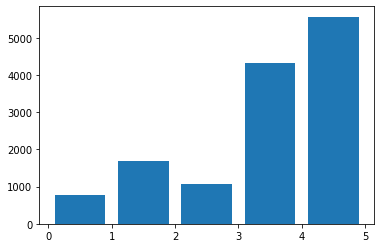

In [15]:
# straight_sat.value_counts().plot(kind='bar')
plt.hist(straight_sat, bins=[0,1,2,3,4,5], rwidth=0.8)

(array([ 178.,  411.,  252.,  810., 1059.]),
 array([0, 1, 2, 3, 4, 5]),
 <a list of 5 Patch objects>)

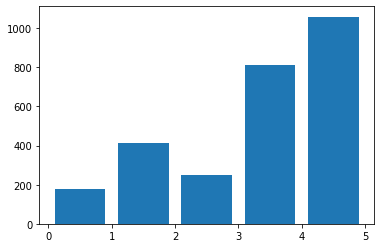

In [59]:
# minor_sat.value_counts().plot(kind='bar')
plt.hist(minor_sat, bins=[0,1,2,3,4,5], rwidth=0.8)

In [21]:
straight_sat.mean(), minor_sat.mean()

(2.9149063223109652, 2.797416974169742)

In [61]:
white_sat = get_sat(df['Ethnicity'] == 'White or of European descent')

In [62]:
colored_sat = get_sat(df['Ethnicity'] != 'White or of European descent')

In [63]:
white_hours = get_hours(df['Ethnicity'] == 'White or of European descent')

In [64]:
colored_hours = get_hours(df['Ethnicity'] != 'White or of European descent')

In [71]:
white_hours_mean, colored_hours_mean, diff = trim_mean(white_hours, colored_hours)

Text(0, 0.5, 'Work Hours per week')

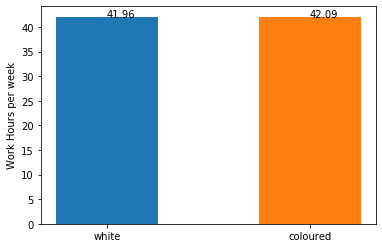

In [83]:
plt.bar(['white'], [white_hours_mean], width=.5)
plt.bar(['coloured'], [colored_hours_mean], width=.5)
plt.text('white', white_hours_mean ,str(round(white_hours_mean,2)))
plt.text('coloured', colored_hours_mean ,str(round(colored_hours_mean,2)))
plt.ylabel('Work Hours per week')

In [94]:
white_salarys = get_salarys(df['Ethnicity'] == 'White or of European descent')

In [95]:
colored_salarys = get_salarys(df['Ethnicity'] != 'White or of European descent')

In [72]:
man_salarys_mean, woman_salarys_mean, diff =trim_mean(man_salarys, woman_salarys)

Text(0, 0.5, 'Total conpensation')

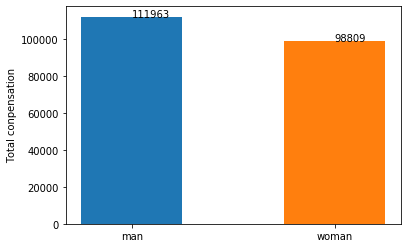

In [88]:
plt.bar(['man'], [man_salarys_mean], width=.5)
plt.text('man', man_salarys_mean ,str(int(man_salarys_mean)))
plt.bar(['woman'], [woman_salarys_mean], width=.5)
plt.text('woman', woman_salarys_mean ,str(int(woman_salarys_mean)))
plt.ylabel('Total conpensation')

In [50]:
trim_mean(man_salarys, woman_salarys, 0.10)

(109921.60351924265, 97642.69724770643, 0.1117060330127617)

In [51]:
man_sat = get_sat(df['Gender'] == 'Man')

In [52]:
woman_sat = get_sat(df['Gender'] == 'Woman')

In [53]:
man_sat.mean(), woman_sat.mean()

(2.896754519712481, 2.9780361757105944)

Text(0, 0.5, 'Total conpensation')

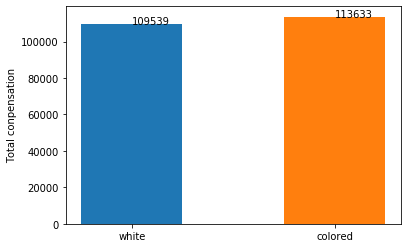

In [98]:
white_salarys_mean, colored_salarys_mean, diff = trim_mean(white_salarys, colored_salarys)
plt.bar(['white'], [white_salarys_mean], width=.5)
plt.text('white', white_salarys_mean ,str(int(white_salarys_mean)))
plt.bar(['colored'], [colored_salarys_mean], width=.5)
plt.text('colored', colored_salarys_mean ,str(int(colored_salarys_mean)))
plt.ylabel('Total conpensation')

In [99]:
straight_salarys = get_salarys(df['Sexuality']=='Straight / Heterosexual')
minor_salarys = get_salarys(df['Sexuality']!='Straight / Heterosexual')

111299.6062639821 106112.35543766578


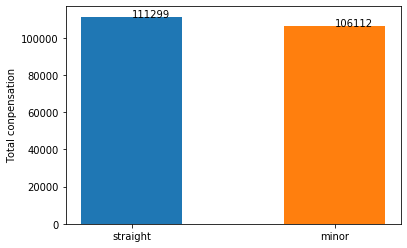

In [100]:
straight_salarys_mean, minor_salarys_mean, diff = trim_mean(straight_salarys, minor_salarys)
plt.bar(['straight'], [straight_salarys_mean], width=.5)
plt.text('straight', straight_salarys_mean ,str(int(straight_salarys_mean)))
plt.bar(['minor'], [minor_salarys_mean], width=.5)
plt.text('minor', minor_salarys_mean ,str(int(minor_salarys_mean)))
plt.ylabel('Total conpensation')
print(straight_salarys_mean, minor_salarys_mean)

In [58]:
df['Employment'].unique()

array(['Not employed, and not looking for work',
       'Not employed, but looking for work', 'Employed full-time',
       'Independent contractor, freelancer, or self-employed', nan,
       'Employed part-time', 'Retired'], dtype=object)